In [80]:
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

In [81]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.utils import shuffle

This is code to get a trivial model running.

No train/validation split here, using all data to train the model.

Also make a prediction and verify the exact meaning of the loss, and mean absolute error.

In [82]:
# Load simulated data: load complete training and validation sets.
np.random.seed(11)

# Training set should be one concatenated shuffled list of simulated examples
# Validation set similarly, but also keep information about simulation parameters
# to evaluate performance in specific simulation conditions.
bounds_files = glob.glob("../data/simulData/*_bmBounds.tab")
intensities_files = [re.sub(r"_bmBounds.tab$", "_intensities.tab", bounds_file)
                     for bounds_file in bounds_files]
y, x = shuffle(
    np.concatenate([np.loadtxt(bounds_file) for bounds_file in bounds_files]),
    np.concatenate([np.loadtxt(intensities_file) for intensities_file in intensities_files])
)

In [84]:
def overlap_metric(y_true, y_predicted):
    y_pred_round = tf.round(y_predicted)
    max_start = tf.math.maximum(y_true[:, 0], y_pred_round[:, 0])
    min_end = tf.math.minimum(y_true[:, 1], y_pred_round[:,1])
    overlap = tf.math.maximum(0.0, min_end - max_start)
    longest_bounds = tf.math.maximum(
        y_true[:, 1] + 1 - y_true[:, 0], 
        y_pred_round[:, 1] + 1 - y_pred_round[:, 0]
        )
    return overlap / longest_bounds

In [104]:
model = tf.keras.Sequential([
        layers.Dense(40, activation='relu'),
        layers.Dense(2, activation='linear')
    ])
model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
    loss='mse', 
    metrics=['mae', overlap_metric]
    )

In [120]:
history = model.fit(x, y, epochs=1000, batch_size=8192, validation_split=0.33)

Train on 60299 samples, validate on 29701 samples
Epoch 1/1000
60299/60299 [==============================] - 0s 2us/step - loss: 1.7234 - mean_absolute_error: 0.9436 - overlap_metric: 0.6502 - val_loss: 1.8698 - val_mean_absolute_error: 0.9848 - val_overlap_metric: 0.6368
Epoch 2/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7892 - mean_absolute_error: 0.9680 - overlap_metric: 0.6449 - val_loss: 1.6839 - val_mean_absolute_error: 0.9166 - val_overlap_metric: 0.6567
Epoch 3/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6350 - mean_absolute_error: 0.9074 - overlap_metric: 0.6563 - val_loss: 1.6879 - val_mean_absolute_error: 0.9176 - val_overlap_metric: 0.6553
Epoch 4/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6478 - mean_absolute_error: 0.9124 - overlap_metric: 0.6551 - val_loss: 1.9373 - val_mean_absolute_error: 1.0195 - val_overlap_metric: 0.6461
Epoch 5/1000
60299/60299 [============================

60299/60299 [==============================] - 0s 1us/step - loss: 1.6390 - mean_absolute_error: 0.9092 - overlap_metric: 0.6554 - val_loss: 2.0085 - val_mean_absolute_error: 1.0445 - val_overlap_metric: 0.6261
Epoch 38/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6710 - mean_absolute_error: 1.5033 - overlap_metric: 0.5520 - val_loss: 3.7956 - val_mean_absolute_error: 1.5968 - val_overlap_metric: 0.5498
Epoch 39/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.6162 - mean_absolute_error: 1.2359 - overlap_metric: 0.6009 - val_loss: 2.0650 - val_mean_absolute_error: 1.0352 - val_overlap_metric: 0.6292
Epoch 40/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.0453 - mean_absolute_error: 1.0503 - overlap_metric: 0.6300 - val_loss: 1.8573 - val_mean_absolute_error: 0.9666 - val_overlap_metric: 0.6459
Epoch 41/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.8476 - mean_absolute_error: 0.9

60299/60299 [==============================] - 0s 1us/step - loss: 2.1898 - mean_absolute_error: 1.1161 - overlap_metric: 0.6176 - val_loss: 2.0923 - val_mean_absolute_error: 1.0842 - val_overlap_metric: 0.6334
Epoch 74/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7987 - mean_absolute_error: 0.9759 - overlap_metric: 0.6442 - val_loss: 2.0065 - val_mean_absolute_error: 1.0464 - val_overlap_metric: 0.6416
Epoch 75/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.8261 - mean_absolute_error: 0.9837 - overlap_metric: 0.6427 - val_loss: 1.7085 - val_mean_absolute_error: 0.9191 - val_overlap_metric: 0.6500
Epoch 76/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6826 - mean_absolute_error: 0.9259 - overlap_metric: 0.6519 - val_loss: 1.6832 - val_mean_absolute_error: 0.9125 - val_overlap_metric: 0.6559
Epoch 77/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6283 - mean_absolute_error: 0.9

60299/60299 [==============================] - 0s 1us/step - loss: 1.7370 - mean_absolute_error: 0.9483 - overlap_metric: 0.6483 - val_loss: 1.8007 - val_mean_absolute_error: 0.9564 - val_overlap_metric: 0.6438
Epoch 110/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7375 - mean_absolute_error: 0.9500 - overlap_metric: 0.6481 - val_loss: 1.9301 - val_mean_absolute_error: 1.0275 - val_overlap_metric: 0.6422
Epoch 111/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7571 - mean_absolute_error: 0.9594 - overlap_metric: 0.6473 - val_loss: 1.7021 - val_mean_absolute_error: 0.9163 - val_overlap_metric: 0.6525
Epoch 112/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6517 - mean_absolute_error: 0.9145 - overlap_metric: 0.6543 - val_loss: 1.6718 - val_mean_absolute_error: 0.9136 - val_overlap_metric: 0.6588
Epoch 113/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6162 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.7436 - mean_absolute_error: 0.9537 - overlap_metric: 0.6481 - val_loss: 1.9899 - val_mean_absolute_error: 1.0287 - val_overlap_metric: 0.6274
Epoch 146/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7399 - mean_absolute_error: 0.9528 - overlap_metric: 0.6475 - val_loss: 1.8871 - val_mean_absolute_error: 1.0100 - val_overlap_metric: 0.6447
Epoch 147/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7028 - mean_absolute_error: 0.9375 - overlap_metric: 0.6506 - val_loss: 1.9048 - val_mean_absolute_error: 1.0031 - val_overlap_metric: 0.6359
Epoch 148/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7061 - mean_absolute_error: 0.9392 - overlap_metric: 0.6499 - val_loss: 1.9002 - val_mean_absolute_error: 1.0087 - val_overlap_metric: 0.6447
Epoch 149/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.0313 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.6723 - mean_absolute_error: 0.9232 - overlap_metric: 0.6511 - val_loss: 1.6835 - val_mean_absolute_error: 0.9168 - val_overlap_metric: 0.6539
Epoch 182/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6492 - mean_absolute_error: 0.9164 - overlap_metric: 0.6546 - val_loss: 1.7122 - val_mean_absolute_error: 0.9318 - val_overlap_metric: 0.6565
Epoch 183/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6267 - mean_absolute_error: 0.9044 - overlap_metric: 0.6567 - val_loss: 1.8290 - val_mean_absolute_error: 0.9791 - val_overlap_metric: 0.6389
Epoch 184/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.8515 - mean_absolute_error: 1.0000 - overlap_metric: 0.6386 - val_loss: 1.6638 - val_mean_absolute_error: 0.9083 - val_overlap_metric: 0.6558
Epoch 185/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7127 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.6401 - mean_absolute_error: 0.9107 - overlap_metric: 0.6554 - val_loss: 1.6904 - val_mean_absolute_error: 0.9215 - val_overlap_metric: 0.6585
Epoch 218/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6029 - mean_absolute_error: 0.8939 - overlap_metric: 0.6589 - val_loss: 1.6627 - val_mean_absolute_error: 0.9104 - val_overlap_metric: 0.6588
Epoch 219/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6116 - mean_absolute_error: 0.8985 - overlap_metric: 0.6580 - val_loss: 1.7284 - val_mean_absolute_error: 0.9351 - val_overlap_metric: 0.6487
Epoch 220/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7040 - mean_absolute_error: 0.9397 - overlap_metric: 0.6493 - val_loss: 1.6406 - val_mean_absolute_error: 0.8987 - val_overlap_metric: 0.6590
Epoch 221/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6563 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.7263 - mean_absolute_error: 0.9461 - overlap_metric: 0.6487 - val_loss: 2.6271 - val_mean_absolute_error: 1.2722 - val_overlap_metric: 0.6078
Epoch 254/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.1249 - mean_absolute_error: 1.0984 - overlap_metric: 0.6230 - val_loss: 1.8102 - val_mean_absolute_error: 0.9660 - val_overlap_metric: 0.6427
Epoch 255/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6848 - mean_absolute_error: 0.9283 - overlap_metric: 0.6517 - val_loss: 1.7680 - val_mean_absolute_error: 0.9412 - val_overlap_metric: 0.6420
Epoch 256/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6768 - mean_absolute_error: 0.9251 - overlap_metric: 0.6519 - val_loss: 1.6630 - val_mean_absolute_error: 0.9096 - val_overlap_metric: 0.6558
Epoch 257/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7021 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.7135 - mean_absolute_error: 0.9417 - overlap_metric: 0.6495 - val_loss: 1.7087 - val_mean_absolute_error: 0.9329 - val_overlap_metric: 0.6548
Epoch 290/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5921 - mean_absolute_error: 0.8929 - overlap_metric: 0.6587 - val_loss: 1.6450 - val_mean_absolute_error: 0.9015 - val_overlap_metric: 0.6574
Epoch 291/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6326 - mean_absolute_error: 0.9099 - overlap_metric: 0.6553 - val_loss: 1.8055 - val_mean_absolute_error: 0.9644 - val_overlap_metric: 0.6397
Epoch 292/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.9050 - mean_absolute_error: 1.0192 - overlap_metric: 0.6341 - val_loss: 1.6443 - val_mean_absolute_error: 0.9013 - val_overlap_metric: 0.6561
Epoch 293/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6685 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.6422 - mean_absolute_error: 0.9150 - overlap_metric: 0.6543 - val_loss: 1.6648 - val_mean_absolute_error: 0.9143 - val_overlap_metric: 0.6589
Epoch 326/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6503 - mean_absolute_error: 0.9160 - overlap_metric: 0.6540 - val_loss: 1.8339 - val_mean_absolute_error: 0.9794 - val_overlap_metric: 0.6418
Epoch 327/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6583 - mean_absolute_error: 0.9229 - overlap_metric: 0.6523 - val_loss: 1.9399 - val_mean_absolute_error: 1.0260 - val_overlap_metric: 0.6447
Epoch 328/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.9554 - mean_absolute_error: 1.0383 - overlap_metric: 0.6329 - val_loss: 2.1629 - val_mean_absolute_error: 1.1108 - val_overlap_metric: 0.6135
Epoch 329/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.8391 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.6514 - mean_absolute_error: 0.9152 - overlap_metric: 0.6523 - val_loss: 1.7115 - val_mean_absolute_error: 0.9254 - val_overlap_metric: 0.6500
Epoch 362/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6416 - mean_absolute_error: 0.9134 - overlap_metric: 0.6543 - val_loss: 1.6666 - val_mean_absolute_error: 0.9150 - val_overlap_metric: 0.6592
Epoch 363/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6407 - mean_absolute_error: 0.9128 - overlap_metric: 0.6550 - val_loss: 1.7337 - val_mean_absolute_error: 0.9337 - val_overlap_metric: 0.6446
Epoch 364/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5963 - mean_absolute_error: 0.8930 - overlap_metric: 0.6579 - val_loss: 1.6364 - val_mean_absolute_error: 0.9010 - val_overlap_metric: 0.6598
Epoch 365/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6176 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.5917 - mean_absolute_error: 0.8917 - overlap_metric: 0.6585 - val_loss: 1.6408 - val_mean_absolute_error: 0.8976 - val_overlap_metric: 0.6581
Epoch 398/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5905 - mean_absolute_error: 0.8920 - overlap_metric: 0.6581 - val_loss: 1.6698 - val_mean_absolute_error: 0.9192 - val_overlap_metric: 0.6542
Epoch 399/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5911 - mean_absolute_error: 0.8932 - overlap_metric: 0.6587 - val_loss: 1.6154 - val_mean_absolute_error: 0.8878 - val_overlap_metric: 0.6569
Epoch 400/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6317 - mean_absolute_error: 0.9093 - overlap_metric: 0.6543 - val_loss: 2.3647 - val_mean_absolute_error: 1.1474 - val_overlap_metric: 0.5858
Epoch 401/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.1329 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.7028 - mean_absolute_error: 0.9434 - overlap_metric: 0.6491 - val_loss: 1.6258 - val_mean_absolute_error: 0.8968 - val_overlap_metric: 0.6608
Epoch 434/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6181 - mean_absolute_error: 0.9063 - overlap_metric: 0.6563 - val_loss: 1.6956 - val_mean_absolute_error: 0.9156 - val_overlap_metric: 0.6501
Epoch 435/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6860 - mean_absolute_error: 0.9311 - overlap_metric: 0.6507 - val_loss: 2.1393 - val_mean_absolute_error: 1.1065 - val_overlap_metric: 0.6327
Epoch 436/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7823 - mean_absolute_error: 0.9715 - overlap_metric: 0.6451 - val_loss: 1.8355 - val_mean_absolute_error: 0.9848 - val_overlap_metric: 0.6458
Epoch 437/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6241 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.6219 - mean_absolute_error: 0.9067 - overlap_metric: 0.6563 - val_loss: 1.6361 - val_mean_absolute_error: 0.8966 - val_overlap_metric: 0.6571
Epoch 470/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5962 - mean_absolute_error: 0.8958 - overlap_metric: 0.6573 - val_loss: 1.7155 - val_mean_absolute_error: 0.9391 - val_overlap_metric: 0.6536
Epoch 471/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5846 - mean_absolute_error: 0.8904 - overlap_metric: 0.6585 - val_loss: 1.6905 - val_mean_absolute_error: 0.9210 - val_overlap_metric: 0.6530
Epoch 472/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6691 - mean_absolute_error: 0.9291 - overlap_metric: 0.6509 - val_loss: 1.7106 - val_mean_absolute_error: 0.9306 - val_overlap_metric: 0.6470
Epoch 473/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6072 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.5934 - mean_absolute_error: 0.8940 - overlap_metric: 0.6580 - val_loss: 1.6876 - val_mean_absolute_error: 0.9192 - val_overlap_metric: 0.6486
Epoch 506/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6517 - mean_absolute_error: 0.9180 - overlap_metric: 0.6524 - val_loss: 1.7511 - val_mean_absolute_error: 0.9548 - val_overlap_metric: 0.6522
Epoch 507/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6269 - mean_absolute_error: 0.9086 - overlap_metric: 0.6555 - val_loss: 1.6952 - val_mean_absolute_error: 0.9198 - val_overlap_metric: 0.6429
Epoch 508/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5832 - mean_absolute_error: 0.8886 - overlap_metric: 0.6580 - val_loss: 1.6232 - val_mean_absolute_error: 0.8958 - val_overlap_metric: 0.6588
Epoch 509/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6628 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.7842 - mean_absolute_error: 0.9732 - overlap_metric: 0.6445 - val_loss: 1.6826 - val_mean_absolute_error: 0.9214 - val_overlap_metric: 0.6540
Epoch 542/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5775 - mean_absolute_error: 0.8877 - overlap_metric: 0.6594 - val_loss: 1.6951 - val_mean_absolute_error: 0.9275 - val_overlap_metric: 0.6594
Epoch 543/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6447 - mean_absolute_error: 0.9173 - overlap_metric: 0.6543 - val_loss: 1.6354 - val_mean_absolute_error: 0.8983 - val_overlap_metric: 0.6551
Epoch 544/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6788 - mean_absolute_error: 0.9338 - overlap_metric: 0.6506 - val_loss: 1.6469 - val_mean_absolute_error: 0.9067 - val_overlap_metric: 0.6608
Epoch 545/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6352 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.6302 - mean_absolute_error: 0.9153 - overlap_metric: 0.6524 - val_loss: 1.6456 - val_mean_absolute_error: 0.9092 - val_overlap_metric: 0.6457
Epoch 578/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5662 - mean_absolute_error: 0.8862 - overlap_metric: 0.6575 - val_loss: 1.6539 - val_mean_absolute_error: 0.9062 - val_overlap_metric: 0.6426
Epoch 579/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7020 - mean_absolute_error: 0.9421 - overlap_metric: 0.6477 - val_loss: 2.5804 - val_mean_absolute_error: 1.2215 - val_overlap_metric: 0.5673
Epoch 580/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.2085 - mean_absolute_error: 1.1281 - overlap_metric: 0.6132 - val_loss: 1.6601 - val_mean_absolute_error: 0.9088 - val_overlap_metric: 0.6516
Epoch 581/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7719 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.7038 - mean_absolute_error: 0.9405 - overlap_metric: 0.6493 - val_loss: 1.8535 - val_mean_absolute_error: 0.9950 - val_overlap_metric: 0.6483
Epoch 614/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6757 - mean_absolute_error: 0.9324 - overlap_metric: 0.6513 - val_loss: 1.6927 - val_mean_absolute_error: 0.9270 - val_overlap_metric: 0.6519
Epoch 615/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5923 - mean_absolute_error: 0.8959 - overlap_metric: 0.6575 - val_loss: 1.6861 - val_mean_absolute_error: 0.9259 - val_overlap_metric: 0.6603
Epoch 616/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5866 - mean_absolute_error: 0.8917 - overlap_metric: 0.6577 - val_loss: 1.7481 - val_mean_absolute_error: 0.9519 - val_overlap_metric: 0.6456
Epoch 617/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6980 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.8606 - mean_absolute_error: 1.0077 - overlap_metric: 0.6356 - val_loss: 1.6083 - val_mean_absolute_error: 0.8879 - val_overlap_metric: 0.6618
Epoch 650/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6078 - mean_absolute_error: 0.9020 - overlap_metric: 0.6566 - val_loss: 1.6206 - val_mean_absolute_error: 0.8978 - val_overlap_metric: 0.6611
Epoch 651/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5528 - mean_absolute_error: 0.8769 - overlap_metric: 0.6611 - val_loss: 1.5947 - val_mean_absolute_error: 0.8851 - val_overlap_metric: 0.6631
Epoch 652/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5897 - mean_absolute_error: 0.8958 - overlap_metric: 0.6574 - val_loss: 1.8016 - val_mean_absolute_error: 0.9686 - val_overlap_metric: 0.6551
Epoch 653/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.8378 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 2.0650 - mean_absolute_error: 1.0895 - overlap_metric: 0.6237 - val_loss: 1.8080 - val_mean_absolute_error: 0.9572 - val_overlap_metric: 0.6293
Epoch 686/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7246 - mean_absolute_error: 0.9464 - overlap_metric: 0.6441 - val_loss: 1.6565 - val_mean_absolute_error: 0.9028 - val_overlap_metric: 0.6560
Epoch 687/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6315 - mean_absolute_error: 0.9105 - overlap_metric: 0.6537 - val_loss: 1.6458 - val_mean_absolute_error: 0.9125 - val_overlap_metric: 0.6600
Epoch 688/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5909 - mean_absolute_error: 0.8954 - overlap_metric: 0.6574 - val_loss: 1.6457 - val_mean_absolute_error: 0.9048 - val_overlap_metric: 0.6629
Epoch 689/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5901 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.5763 - mean_absolute_error: 0.8881 - overlap_metric: 0.6593 - val_loss: 1.7214 - val_mean_absolute_error: 0.9444 - val_overlap_metric: 0.6543
Epoch 722/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5785 - mean_absolute_error: 0.8907 - overlap_metric: 0.6588 - val_loss: 1.6278 - val_mean_absolute_error: 0.8929 - val_overlap_metric: 0.6563
Epoch 723/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7451 - mean_absolute_error: 0.9572 - overlap_metric: 0.6465 - val_loss: 2.4629 - val_mean_absolute_error: 1.2209 - val_overlap_metric: 0.6158
Epoch 724/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.8664 - mean_absolute_error: 1.0079 - overlap_metric: 0.6390 - val_loss: 1.8364 - val_mean_absolute_error: 0.9868 - val_overlap_metric: 0.6496
Epoch 725/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6900 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 2.0081 - mean_absolute_error: 1.0520 - overlap_metric: 0.6249 - val_loss: 2.0300 - val_mean_absolute_error: 1.0607 - val_overlap_metric: 0.5785
Epoch 758/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.8239 - mean_absolute_error: 0.9958 - overlap_metric: 0.6254 - val_loss: 1.8147 - val_mean_absolute_error: 0.9610 - val_overlap_metric: 0.6225
Epoch 759/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6682 - mean_absolute_error: 0.9282 - overlap_metric: 0.6478 - val_loss: 1.6365 - val_mean_absolute_error: 0.8935 - val_overlap_metric: 0.6554
Epoch 760/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5881 - mean_absolute_error: 0.8924 - overlap_metric: 0.6565 - val_loss: 1.6370 - val_mean_absolute_error: 0.9030 - val_overlap_metric: 0.6605
Epoch 761/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5842 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.6166 - mean_absolute_error: 0.9078 - overlap_metric: 0.6540 - val_loss: 1.5806 - val_mean_absolute_error: 0.8761 - val_overlap_metric: 0.6646
Epoch 794/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5445 - mean_absolute_error: 0.8742 - overlap_metric: 0.6613 - val_loss: 1.6743 - val_mean_absolute_error: 0.9226 - val_overlap_metric: 0.6502
Epoch 795/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5595 - mean_absolute_error: 0.8812 - overlap_metric: 0.6604 - val_loss: 1.6852 - val_mean_absolute_error: 0.9286 - val_overlap_metric: 0.6556
Epoch 796/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.0212 - mean_absolute_error: 1.0711 - overlap_metric: 0.6274 - val_loss: 1.8805 - val_mean_absolute_error: 0.9904 - val_overlap_metric: 0.6303
Epoch 797/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7429 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.5612 - mean_absolute_error: 0.8826 - overlap_metric: 0.6596 - val_loss: 1.5715 - val_mean_absolute_error: 0.8712 - val_overlap_metric: 0.6619
Epoch 830/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6518 - mean_absolute_error: 0.9263 - overlap_metric: 0.6515 - val_loss: 1.5840 - val_mean_absolute_error: 0.8747 - val_overlap_metric: 0.6577
Epoch 831/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5841 - mean_absolute_error: 0.8948 - overlap_metric: 0.6577 - val_loss: 1.5797 - val_mean_absolute_error: 0.8765 - val_overlap_metric: 0.6624
Epoch 832/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5633 - mean_absolute_error: 0.8841 - overlap_metric: 0.6591 - val_loss: 1.6227 - val_mean_absolute_error: 0.8898 - val_overlap_metric: 0.6523
Epoch 833/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5543 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.6189 - mean_absolute_error: 0.9080 - overlap_metric: 0.6543 - val_loss: 1.6612 - val_mean_absolute_error: 0.9166 - val_overlap_metric: 0.6541
Epoch 866/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5385 - mean_absolute_error: 0.8728 - overlap_metric: 0.6615 - val_loss: 1.5804 - val_mean_absolute_error: 0.8759 - val_overlap_metric: 0.6578
Epoch 867/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5445 - mean_absolute_error: 0.8771 - overlap_metric: 0.6605 - val_loss: 1.7610 - val_mean_absolute_error: 0.9492 - val_overlap_metric: 0.6395
Epoch 868/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.0547 - mean_absolute_error: 1.0813 - overlap_metric: 0.6237 - val_loss: 1.6812 - val_mean_absolute_error: 0.9238 - val_overlap_metric: 0.6574
Epoch 869/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.7077 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.6423 - mean_absolute_error: 0.9206 - overlap_metric: 0.6513 - val_loss: 1.5786 - val_mean_absolute_error: 0.8733 - val_overlap_metric: 0.6599
Epoch 902/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5766 - mean_absolute_error: 0.8903 - overlap_metric: 0.6580 - val_loss: 1.5666 - val_mean_absolute_error: 0.8688 - val_overlap_metric: 0.6642
Epoch 903/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5585 - mean_absolute_error: 0.8835 - overlap_metric: 0.6599 - val_loss: 1.8015 - val_mean_absolute_error: 0.9754 - val_overlap_metric: 0.6519
Epoch 904/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.9772 - mean_absolute_error: 1.0567 - overlap_metric: 0.6296 - val_loss: 1.7186 - val_mean_absolute_error: 0.9301 - val_overlap_metric: 0.6500
Epoch 905/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6634 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.5960 - mean_absolute_error: 0.8959 - overlap_metric: 0.6569 - val_loss: 1.8435 - val_mean_absolute_error: 0.9964 - val_overlap_metric: 0.6469
Epoch 938/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6905 - mean_absolute_error: 0.9415 - overlap_metric: 0.6498 - val_loss: 1.8374 - val_mean_absolute_error: 0.9873 - val_overlap_metric: 0.6402
Epoch 939/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5957 - mean_absolute_error: 0.9008 - overlap_metric: 0.6554 - val_loss: 1.5705 - val_mean_absolute_error: 0.8697 - val_overlap_metric: 0.6618
Epoch 940/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5162 - mean_absolute_error: 0.8636 - overlap_metric: 0.6627 - val_loss: 1.6378 - val_mean_absolute_error: 0.9063 - val_overlap_metric: 0.6398
Epoch 941/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5440 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 1.5900 - mean_absolute_error: 0.8989 - overlap_metric: 0.6567 - val_loss: 1.6167 - val_mean_absolute_error: 0.8937 - val_overlap_metric: 0.6616
Epoch 974/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.6073 - mean_absolute_error: 0.9097 - overlap_metric: 0.6534 - val_loss: 1.6199 - val_mean_absolute_error: 0.9031 - val_overlap_metric: 0.6533
Epoch 975/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5946 - mean_absolute_error: 0.9003 - overlap_metric: 0.6539 - val_loss: 1.7339 - val_mean_absolute_error: 0.9602 - val_overlap_metric: 0.6446
Epoch 976/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5719 - mean_absolute_error: 0.8900 - overlap_metric: 0.6566 - val_loss: 1.5755 - val_mean_absolute_error: 0.8733 - val_overlap_metric: 0.6558
Epoch 977/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1.5116 - mean_absolute_error:

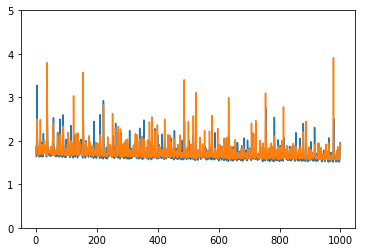

In [121]:
plt.ylim(0, 5)
plt.plot(range(len(history.history['loss'])), history.history['loss'], history.history['val_loss'])

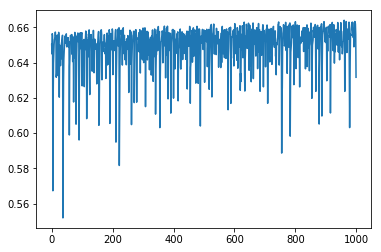

In [122]:
plt.plot(range(len(history.history['overlap_metric'])),history.history['overlap_metric'])

In [116]:
print(history.history.keys()) 

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_overlap_metric', 'loss', 'mean_absolute_error', 'overlap_metric'])


## Final accuracy

In [123]:
print("Mean absolute error", history.history['val_mean_absolute_error'][-1])
print("Overlap metric", history.history['val_overlap_metric'][-1])

Mean absolute error 0.9884182633721408
Overlap metric 0.6315455085673094
